# DATA TRAIN

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Tugas Kelompok 5/fraud dataset.csv")

## Data Understanding

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
plt.figure(figsize=(10,10))
data['flag_transaksi_fraud'].value_counts().plot.pie(shadow=True, explode = [0,0.1],autopct='%1.2f%%')
plt.title("Persentase Fraud dan Tidak Fraud")
plt.legend()
plt.show()

## Preprocessing

### Data Type

In [ ]:
data.dtypes

In [ ]:
data["rata_rata_nilai_transaksi"]=data["rata_rata_nilai_transaksi"].str.replace('.', '')

In [ ]:
data.head()

In [ ]:
data["rata_rata_nilai_transaksi"]=data["rata_rata_nilai_transaksi"].astype("float64")

In [ ]:
data.dtypes

In [ ]:
data['flag_transaksi_finansial'].value_counts()

### Missing Value

In [ ]:
data.isnull().sum()

### Imputasi

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data["rata_rata_nilai_transaksi"])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data["maksimum_nilai_transaksi"])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data["minimum_nilai_transaksi"])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data["rata_rata_jumlah_transaksi"])
plt.show()

In [ ]:
data["rata_rata_nilai_transaksi"].fillna(data["rata_rata_nilai_transaksi"].median(),inplace=True)
data["maksimum_nilai_transaksi"].fillna(data["maksimum_nilai_transaksi"].median(),inplace=True)
data["minimum_nilai_transaksi"].fillna(data["minimum_nilai_transaksi"].median(),inplace=True)
data["rata_rata_jumlah_transaksi"].fillna(data["rata_rata_jumlah_transaksi"].median(),inplace=True)

In [ ]:
data.isnull().sum()

### Duplikasi Data

In [ ]:
data.duplicated().sum()

In [ ]:
data.shape

### Outlier

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(15,10))
axes[0,0].set_title("rata_rata_nilai_transaksi")
axes[0,1].set_title("maksimum_nilai_transaksi")
axes[1,0].set_title("minimum_nilai_transaksi")
axes[1,1].set_title("rata_rata_jumlah_transaksi")

sns.boxplot(data["rata_rata_nilai_transaksi"], ax=axes[0,0])
sns.boxplot(data["maksimum_nilai_transaksi"], ax=axes[0,1])
sns.boxplot(data["minimum_nilai_transaksi"], ax=axes[1,0])
sns.boxplot(data["rata_rata_jumlah_transaksi"], ax=axes[1,1])

fig.tight_layout()

### Handling Outlier

In [ ]:
Q1_maks=data["maksimum_nilai_transaksi"].quantile(0.25)
Q3_maks=data["maksimum_nilai_transaksi"].quantile(0.75)
IQR_maks=Q3_maks - Q1_maks
lower_range_maks = Q1_maks -(1.5 * IQR_maks)
upper_range_maks= Q3_maks +(1.5 * IQR_maks)
data.loc[(data["maksimum_nilai_transaksi"]>upper_range_maks),:]

In [ ]:
data.loc[(data["maksimum_nilai_transaksi"]>upper_range_maks),"maksimum_nilai_transaksi"]=upper_range_maks

In [ ]:
Q1_min=data["minimum_nilai_transaksi"].quantile(0.25)
Q3_min=data["minimum_nilai_transaksi"].quantile(0.75)
IQR_min=Q3_min - Q1_min
lower_range_min = Q1_min -(1.5 * IQR_min)
upper_range_min= Q3_min +(1.5 * IQR_min)
data.loc[(data["minimum_nilai_transaksi"]>upper_range_min),:]

In [ ]:
data.loc[(data["minimum_nilai_transaksi"]>upper_range_min),"minimum_nilai_transaksi"]=upper_range_min

In [ ]:
Q1_rata=data["rata_rata_jumlah_transaksi"].quantile(0.25)
Q3_rata=data["rata_rata_jumlah_transaksi"].quantile(0.75)
IQR_rata=Q3_rata - Q1_rata
lower_range_rata = Q1_rata -(1.5 * IQR_rata)
upper_range_rata= Q3_rata +(1.5 * IQR_rata)
data.loc[(data["rata_rata_jumlah_transaksi"]>upper_range_rata),:]

In [ ]:
data.loc[(data["rata_rata_jumlah_transaksi"]>upper_range_rata),"rata_rata_jumlah_transaksi"]=upper_range_rata

## Split Data

In [ ]:
data = data.drop(labels=['Id','flag_transaksi_finansial'], axis=1)

In [ ]:
data.head()

In [ ]:
data['flag_transaksi_fraud'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(data,test_size = 0.20 ,random_state = 123)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='flag_transaksi_fraud',axis=1)
train_Y = train['flag_transaksi_fraud']
test_X  = test.drop(labels='flag_transaksi_fraud',axis=1)
test_Y  = test['flag_transaksi_fraud']

In [ ]:
train.shape

In [ ]:
test.shape

## Data Modelling



##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [ ]:
train_Y.value_counts()

In [ ]:
train_smote_Y.value_counts()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=123)

In [ ]:
rfc.fit(train_smote_X, train_smote_Y)
predrf=rfc.predict(test_X)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,predrf))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, predrf, target_names=target_names))

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, predrf)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predrf)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
param_grid_lr  = {
    'penalty': ['l1', 'l2'],
    'tol': [0.00001, 0.0001, 0.001],
    'C': [1, 50, 100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv= 5)
CV_lr.fit(train_smote_X, train_smote_Y)

In [ ]:
CV_lr.best_params_

In [ ]:
predlr=CV_lr.predict(test_X)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logistic Regression on CV data: ",accuracy_score(test_Y,predlr))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, predlr, target_names=target_names))

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, predlr)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predlr)

## SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
svm= svm.SVC()

In [ ]:
svm.fit(train_smote_X,train_smote_Y)

In [ ]:
predsvm=svm.predict(test_X)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Support Vector Machine on CV data: ",accuracy_score(test_Y,predsvm))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, predsvm, target_names=target_names))

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(test_Y, predsvm)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predsvm)

## XGBoost

In [ ]:
import xgboost
xgb=xgboost.XGBClassifier()

In [ ]:
xgb.fit(train_smote_X,train_smote_Y)

In [ ]:
predxgb=xgb.predict(test_X)

### Evaluation

In [ ]:
print("Accuracy for XGboost on CV data: ",accuracy_score(test_Y,predxgb))

In [ ]:
target_names = ['No','Yes']
print(classification_report(test_Y, predxgb, target_names=target_names))

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(test_Y, predxgb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predxgb)

## XGBoost Grid

In [ ]:
param_grid_xgb = {
        "gamma":[0.5, 1, 1.5, 2, 5],
        "max_depth":[3,4,5,6],
        "min_child_weight": [100],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "learning_rate": [0.1, 0.01, 0.001]
    }

In [ ]:
CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv= 5)
CV_xgb.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'learning_rate': [0.1, 0.01, 0.001]

In [ ]:
CV_xgb.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 100,
 'subsample': 1.0}

In [ ]:
predCV_xgb=CV_xgb.predict(test_X)

### Evaluation

In [ ]:
print("Accuracy for XGboost on CV data: ",accuracy_score(test_Y,predxgb))

Accuracy for XGboost on CV data:  0.9297632906480403


In [ ]:
target_names = ['No','Yes']
print(classification_report(test_Y, predxgb, target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.97      0.96      2410
         Yes       0.44      0.30      0.36       167

    accuracy                           0.93      2577
   macro avg       0.70      0.64      0.66      2577
weighted avg       0.92      0.93      0.92      2577



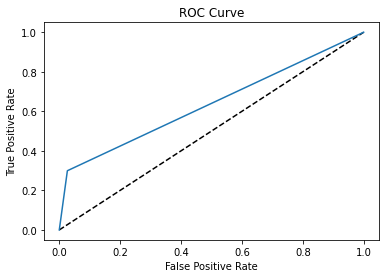

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(test_Y, predxgb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predxgb)

0.6364225905036399

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [3,5,7,20]}

In [ ]:
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv= 5)
CV_dt.fit(train_smote_X,train_smote_Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
CV_dt.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [ ]:
preddt=CV_dt.predict(test_X)

### Evaluation

In [ ]:
print("Accuracy for Decision Tree on CV data: ",accuracy_score(test_Y,preddt))

Accuracy for Decision Tree on CV data:  0.8808692277842453


In [ ]:
target_names = ['No','Yes']
print(classification_report(test_Y, preddt, target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.93      0.94      2410
         Yes       0.18      0.24      0.21       167

    accuracy                           0.88      2577
   macro avg       0.56      0.58      0.57      2577
weighted avg       0.90      0.88      0.89      2577



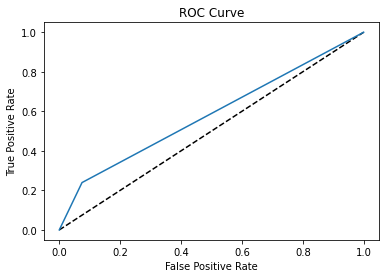

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_dt, tpr_dt, thresholds_dt= roc_curve(test_Y, preddt)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,preddt)

0.5824160807016673

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
param_grid_knn = { 
    'n_neighbors': range(1, 32, 1)
 }

In [ ]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv= 5)
CV_knn.fit(train_smote_X,train_smote_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 32)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
CV_knn.best_params_

{'n_neighbors': 1}

In [ ]:
predknn=CV_knn.predict(test_X)

### Evaluation

In [ ]:
print("Accuracy for KNN on CV data: ",accuracy_score(test_Y,predknn))

Accuracy for KNN on CV data:  0.8137369033760187


In [ ]:
target_names = ['No','Yes']
print(classification_report(test_Y, predknn, target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.85      0.90      2410
         Yes       0.11      0.27      0.16       167

    accuracy                           0.81      2577
   macro avg       0.53      0.56      0.53      2577
weighted avg       0.89      0.81      0.85      2577



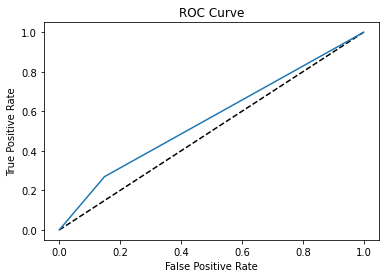

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_knn, tpr_knn, thresholds_knn= roc_curve(test_Y, predknn)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predknn)

0.5604566800009939

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_smote_X,train_smote_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
prednb=nb.predict(test_X)

### Evaluation

In [ ]:
print("Accuracy for Naive Bayes on CV data: ",accuracy_score(test_Y,prednb))

Accuracy for Naive Bayes on CV data:  0.6623981373690337


In [ ]:
target_names = ['No','Yes']
print(classification_report(test_Y, prednb, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.67      0.79      2410
         Yes       0.11      0.60      0.19       167

    accuracy                           0.66      2577
   macro avg       0.54      0.63      0.49      2577
weighted avg       0.90      0.66      0.75      2577



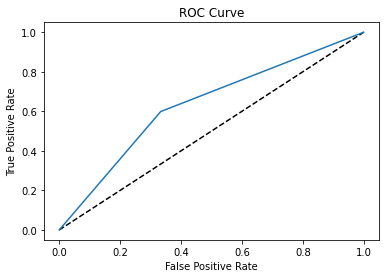

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_nb, tpr_nb, thresholds_nb= roc_curve(test_Y, prednb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nb, tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,prednb)

0.6328036872313464

# DATA TEST

In [ ]:
uji=pd.read_csv("/content/drive/MyDrive/Tugas Kelompok 5/Data Predict.csv")

## Preprocessing

### Data Type

In [ ]:
uji.dtypes

Id                              int64
id_tanggal_transaksi_awal       int64
tanggal_transaksi_awal          int64
tipe_kartu                      int64
id_merchant                     int64
nama_merchant                   int64
tipe_mesin                      int64
tipe_transaksi                  int64
nama_transaksi                  int64
nilai_transaksi                 int64
id_negara                       int64
nama_negara                     int64
nama_kota                       int64
lokasi_mesin                    int64
pemilik_mesin                   int64
waktu_transaksi                 int64
kuartal_transaksi               int64
kepemilikan_kartu               int64
nama_channel                    int64
id_channel                      int64
flag_transaksi_finansial         bool
status_transaksi                int64
bank_pemilik_kartu              int64
rata_rata_nilai_transaksi      object
maksimum_nilai_transaksi      float64
minimum_nilai_transaksi       float64
rata_rata_ju

In [ ]:
uji["rata_rata_nilai_transaksi"]=uji["rata_rata_nilai_transaksi"].str.replace('.', '')

In [ ]:
uji.head()

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi
0,6678,2457607,2457703,111,-2,1798,1590933,385,11,1250000,96,5,241,1835,613,162158,3,2,1,9,False,3,999,2877203488,2300000.0,21600.0,1.20
1,437,2457579,2457592,93,-2,1798,2687662,26,10,50000,96,5,128,4173,613,104856,2,2,1,9,False,3,999,3389741935,1400000.0,64524.0,1.52
2,1696,2457349,2457359,103,-2,1798,2254860,385,11,500000,96,5,128,3195,613,145437,3,2,1,9,False,3,999,797473227,1750000.0,250000.0,1.46
3,8868,2457623,2457637,0,128022,1254,2688775,58,6,45000,96,5,70,6649,1864,113028,2,2,2,4,False,3,999,6457195423,8000000.0,23000.0,2.90
4,7014,2457467,2457499,93,-2,1798,-3,156,12,1000000,96,5,8,4,9,171338,3,1,5,8,False,3,999,2116285714,12000000.0,200000.0,2.69


In [ ]:
uji["rata_rata_nilai_transaksi"]=uji["rata_rata_nilai_transaksi"].astype("float64")

In [ ]:
uji.dtypes

Id                              int64
id_tanggal_transaksi_awal       int64
tanggal_transaksi_awal          int64
tipe_kartu                      int64
id_merchant                     int64
nama_merchant                   int64
tipe_mesin                      int64
tipe_transaksi                  int64
nama_transaksi                  int64
nilai_transaksi                 int64
id_negara                       int64
nama_negara                     int64
nama_kota                       int64
lokasi_mesin                    int64
pemilik_mesin                   int64
waktu_transaksi                 int64
kuartal_transaksi               int64
kepemilikan_kartu               int64
nama_channel                    int64
id_channel                      int64
flag_transaksi_finansial         bool
status_transaksi                int64
bank_pemilik_kartu              int64
rata_rata_nilai_transaksi     float64
maksimum_nilai_transaksi      float64
minimum_nilai_transaksi       float64
rata_rata_ju

In [ ]:
uji['flag_transaksi_finansial'].value_counts()

False    240
Name: flag_transaksi_finansial, dtype: int64

### Missing Value

In [ ]:
uji.isnull().sum()

Id                            0
id_tanggal_transaksi_awal     0
tanggal_transaksi_awal        0
tipe_kartu                    0
id_merchant                   0
nama_merchant                 0
tipe_mesin                    0
tipe_transaksi                0
nama_transaksi                0
nilai_transaksi               0
id_negara                     0
nama_negara                   0
nama_kota                     0
lokasi_mesin                  0
pemilik_mesin                 0
waktu_transaksi               0
kuartal_transaksi             0
kepemilikan_kartu             0
nama_channel                  0
id_channel                    0
flag_transaksi_finansial      0
status_transaksi              0
bank_pemilik_kartu            0
rata_rata_nilai_transaksi     1
maksimum_nilai_transaksi      1
minimum_nilai_transaksi       1
rata_rata_jumlah_transaksi    1
dtype: int64

### Imputasi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


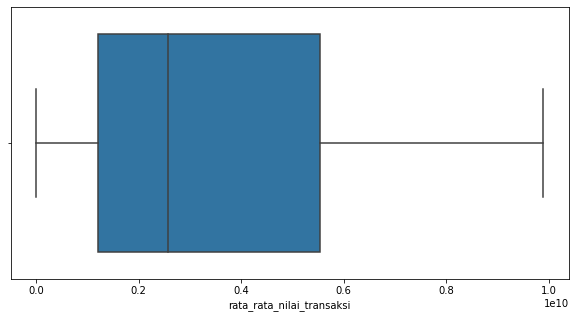

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(uji["rata_rata_nilai_transaksi"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


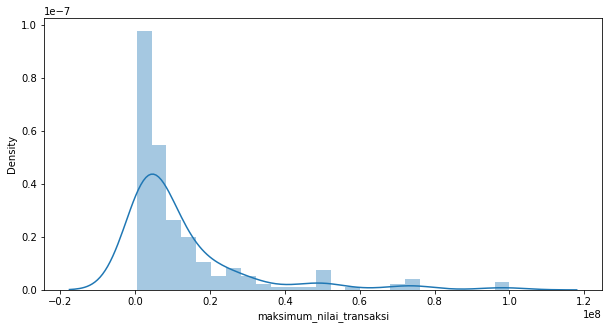

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(uji["maksimum_nilai_transaksi"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


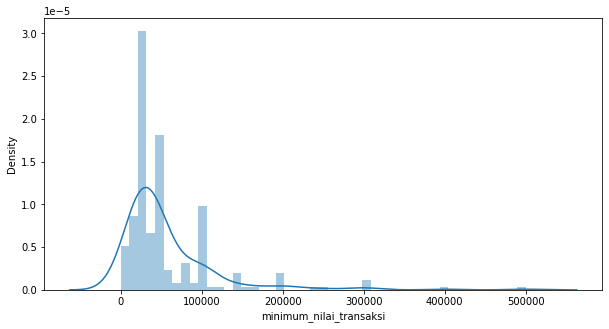

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(uji["minimum_nilai_transaksi"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


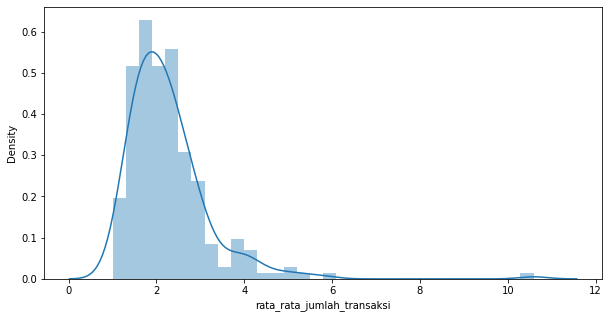

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(uji["rata_rata_jumlah_transaksi"])
plt.show()

In [ ]:
uji["rata_rata_nilai_transaksi"].fillna(uji["rata_rata_nilai_transaksi"].median(),inplace=True)
uji["maksimum_nilai_transaksi"].fillna(uji["maksimum_nilai_transaksi"].median(),inplace=True)
uji["minimum_nilai_transaksi"].fillna(uji["minimum_nilai_transaksi"].median(),inplace=True)
uji["rata_rata_jumlah_transaksi"].fillna(uji["rata_rata_jumlah_transaksi"].median(),inplace=True)

In [ ]:
uji.isnull().sum()

Id                            0
id_tanggal_transaksi_awal     0
tanggal_transaksi_awal        0
tipe_kartu                    0
id_merchant                   0
nama_merchant                 0
tipe_mesin                    0
tipe_transaksi                0
nama_transaksi                0
nilai_transaksi               0
id_negara                     0
nama_negara                   0
nama_kota                     0
lokasi_mesin                  0
pemilik_mesin                 0
waktu_transaksi               0
kuartal_transaksi             0
kepemilikan_kartu             0
nama_channel                  0
id_channel                    0
flag_transaksi_finansial      0
status_transaksi              0
bank_pemilik_kartu            0
rata_rata_nilai_transaksi     0
maksimum_nilai_transaksi      0
minimum_nilai_transaksi       0
rata_rata_jumlah_transaksi    0
dtype: int64

### Duplikasi Data

In [ ]:
uji.duplicated().sum()

0

In [ ]:
uji.shape

(240, 27)

### Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

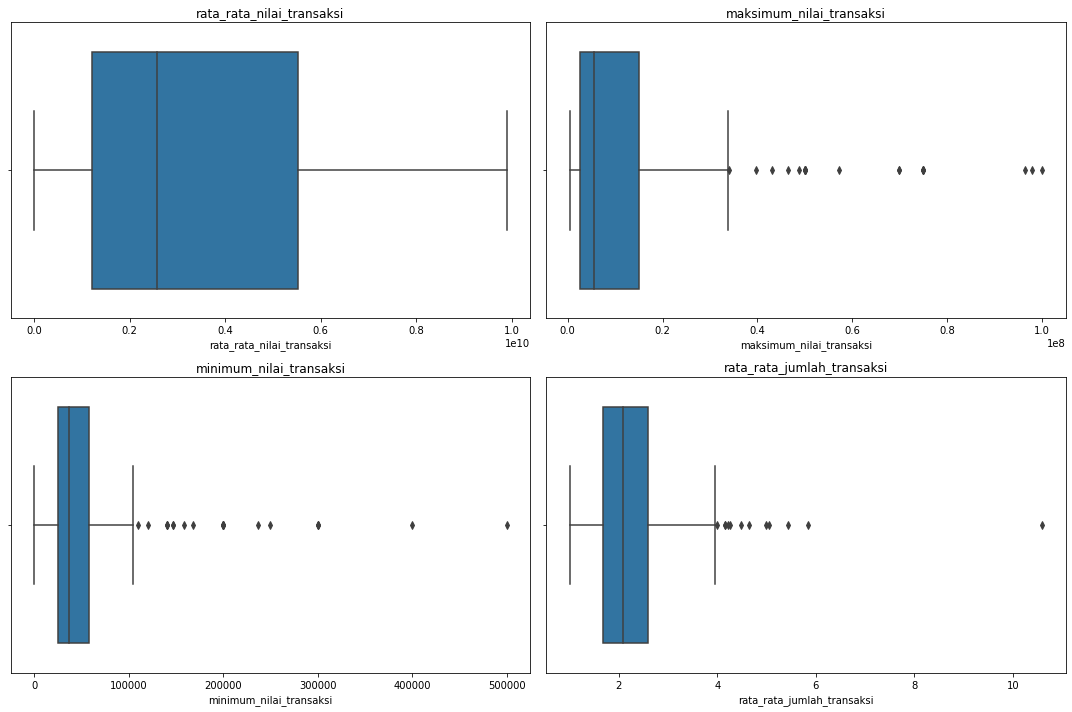

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(15,10))
axes[0,0].set_title("rata_rata_nilai_transaksi")
axes[0,1].set_title("maksimum_nilai_transaksi")
axes[1,0].set_title("minimum_nilai_transaksi")
axes[1,1].set_title("rata_rata_jumlah_transaksi")

sns.boxplot(uji["rata_rata_nilai_transaksi"], ax=axes[0,0])
sns.boxplot(uji["maksimum_nilai_transaksi"], ax=axes[0,1])
sns.boxplot(uji["minimum_nilai_transaksi"], ax=axes[1,0])
sns.boxplot(uji["rata_rata_jumlah_transaksi"], ax=axes[1,1])

fig.tight_layout()

### Handling Outlier

In [ ]:
Q1_maksuji=uji["maksimum_nilai_transaksi"].quantile(0.25)
Q3_maksuji=uji["maksimum_nilai_transaksi"].quantile(0.75)
IQR_maksuji=Q3_maksuji - Q1_maksuji
lower_range_maksuji = Q1_maksuji -(1.5 * IQR_maksuji)
upper_range_maksuji= Q3_maksuji +(1.5 * IQR_maksuji)
uji.loc[(uji["maksimum_nilai_transaksi"]>upper_range_maksuji),:]

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi
12,505,2457587,2457630,93,279648,1253,2653395,58,6,5823000,96,5,96,6478,1854,131708,3,2,2,4,False,3,999,4.450000e+06,50000000.0,100000.0,1.55
19,6294,2457568,2457617,93,-2,1798,2309371,26,10,1250000,96,5,128,3248,613,122445,3,2,1,9,False,3,999,9.847912e+09,46500000.0,19000.0,3.40
50,6373,2457661,2457754,93,702705,273,3359848,58,6,270000,96,5,150,6231,611,211432,4,2,2,4,False,3,999,1.033005e+09,98000000.0,50000.0,3.32
63,5206,2457517,2457566,93,-2,1798,2176668,238,9,2950000,96,5,251,7892,613,94142,2,2,1,9,False,3,999,5.532031e+09,57127000.0,11500.0,5.83
64,14083,2457476,2457508,2,636536,1510,2013725,58,6,9350000,96,5,259,7656,2231,82154,2,2,2,4,False,3,999,9.065365e+09,100000000.0,41804.0,2.32
68,10868,2457316,2457367,93,374848,1797,1616191,58,6,421212,96,5,265,5961,2616,193233,4,2,2,4,False,3,999,3.194832e+09,33980000.0,32600.0,1.38
69,1255,2457572,2457638,111,-2,1798,2003763,238,9,1700000,96,5,70,5558,613,103511,2,2,1,9,False,3,999,3.961719e+09,50000000.0,50000.0,1.44
76,4798,2457349,2457377,111,-2,1798,226362,238,9,200000,96,5,128,5363,613,203700,4,2,1,9,False,3,999,2.248279e+09,50000000.0,25000.0,4.47
79,13976,2457509,2457598,93,319233,219,1859928,58,6,2184700,96,5,101,7157,534,153856,3,2,2,4,False,3,999,5.532031e+09,75000000.0,26500.0,2.40
84,2420,2457430,2457465,93,-2,1798,2550686,26,10,1250000,96,5,128,4064,613,130428,3,2,1,9,False,3,999,1.030897e+09,96486000.0,8099.0,2.80


In [ ]:
uji.loc[(uji["maksimum_nilai_transaksi"]>upper_range_maksuji),"maksimum_nilai_transaksi"]=upper_range_maksuji

In [ ]:
Q1_minuji=uji["minimum_nilai_transaksi"].quantile(0.25)
Q3_minuji=uji["minimum_nilai_transaksi"].quantile(0.75)
IQR_minuji=Q3_min - Q1_minuji
lower_range_minuji = Q1_minuji -(1.5 * IQR_minuji)
upper_range_minuji= Q3_minuji +(1.5 * IQR_minuji)
uji.loc[(uji["minimum_nilai_transaksi"]>upper_range_minuji),:]

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi
2,1696,2457349,2457359,103,-2,1798,2254860,385,11,500000,96,5,128,3195,613,145437,3,2,1,9,False,3,999,7.974732e+08,1750000.0,250000.0,1.46
4,7014,2457467,2457499,93,-2,1798,-3,156,12,1000000,96,5,8,4,9,171338,3,1,5,8,False,3,999,2.116286e+09,12000000.0,200000.0,2.69
8,14786,2457529,2457572,111,123189,1670,2734067,58,6,2499000,96,5,128,7046,2464,102907,2,2,2,4,False,3,999,2.917987e+09,7328969.0,500000.0,2.50
10,4597,2457504,2457551,104,-2,1798,3126091,238,9,1000000,96,5,75,7933,613,170539,3,2,1,9,False,3,999,2.120522e+09,15000000.0,147000.0,1.80
33,12727,2457476,2457506,0,-2,1798,84019,159,19,4000000,96,5,128,3317,613,62025,2,2,1,9,False,3,999,1.965300e+08,11110000.0,300000.0,1.29
34,14312,2457347,2457405,103,-2,1798,2351274,385,11,1000000,96,5,75,3523,613,124322,3,2,1,9,False,3,999,1.311742e+09,15000000.0,300000.0,3.23
39,14002,2457324,2457419,103,-2,1798,118233,301,16,4500000,96,5,60,5182,613,202625,4,2,1,9,False,3,999,2.558486e+09,20000000.0,237000.0,2.32
48,11586,2457550,2457592,93,-2,1798,2713939,385,11,2500000,96,5,293,8490,613,84640,2,2,1,9,False,3,999,7.705518e+09,2500000.0,168000.0,1.43
59,11578,2457364,2457396,0,-2,1798,1406175,26,10,200000,96,5,128,1172,613,221726,4,2,1,9,False,3,999,6.013947e+09,1250000.0,200000.0,1.14
62,10240,2457410,2457500,4,-2,1798,701282,385,11,2500000,96,5,128,5079,613,22127,1,2,1,9,False,3,999,2.373577e+09,20000000.0,158650.0,1.50


In [ ]:
uji.loc[(uji["minimum_nilai_transaksi"]>upper_range_minuji),"minimum_nilai_transaksi"]=upper_range_minuji

In [ ]:
Q1_ratauji=uji["rata_rata_jumlah_transaksi"].quantile(0.25)
Q3_ratauji=uji["rata_rata_jumlah_transaksi"].quantile(0.75)
IQR_ratauji=Q3_ratauji - Q1_ratauji
lower_range_ratauji = Q1_ratauji -(1.5 * IQR_ratauji)
upper_range_ratauji= Q3_ratauji +(1.5 * IQR_ratauji)
uji.loc[(uji["rata_rata_jumlah_transaksi"]>upper_range_ratauji),:]

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi
5,13767,2457530,2457609,111,-2,1798,3181082,26,10,2000000,96,5,128,4547,613,173421,3,2,1,9,False,3,999,3.392190e+09,19900000.0,76000.0,4.00
31,5265,2457410,2457485,4,-2,1798,91,385,11,3460210,96,5,186,5582,613,120649,3,2,1,9,False,3,999,1.901405e+09,20000000.0,100000.0,4.26
49,1522,2457313,2457391,93,-2,1798,2421258,26,10,50000,96,5,203,3620,613,214350,4,2,1,9,False,3,999,1.005667e+09,28000000.0,40000.0,10.59
63,5206,2457517,2457566,93,-2,1798,2176668,238,9,2950000,96,5,251,7892,613,94142,2,2,1,9,False,3,999,5.532031e+09,33750000.0,11500.0,5.83
65,12717,2457444,2457503,93,-2,1798,2086341,385,11,2500000,96,5,265,3086,613,65437,2,2,1,9,False,3,999,1.667487e+09,20000000.0,48500.0,4.15
76,4798,2457349,2457377,111,-2,1798,226362,238,9,200000,96,5,128,5363,613,203700,4,2,1,9,False,3,999,2.248279e+09,33750000.0,25000.0,4.47
95,10043,2457598,2457605,111,-2,1798,2632326,238,9,1000000,96,5,128,8039,613,160438,3,2,1,9,False,3,999,2.820267e+09,33750000.0,50000.0,4.15
101,3051,2457389,2457467,93,-2,1798,329209,147,3,2555227,96,5,96,4844,613,155948,3,2,1,9,False,3,999,5.351677e+09,33750000.0,15000.0,4.22
148,6715,2457437,2457526,104,-2,1798,1518190,385,11,1250000,96,5,265,1622,613,84325,2,2,1,9,False,3,999,3.232432e+09,2450000.0,10.0,4.99
169,6074,2457348,2457415,111,-2,1798,1325553,26,10,1250000,96,5,128,815,613,82108,2,2,1,9,False,3,999,2.579913e+09,1700000.0,20300.0,5.05


In [ ]:
uji.loc[(uji["rata_rata_jumlah_transaksi"]>upper_range_ratauji),"rata_rata_jumlah_transaksi"]=upper_range_ratauji

## Applying Model

In [ ]:
ujiready = uji.drop(labels=['Id','flag_transaksi_finansial'], axis=1)

In [ ]:
ujiready.head()

,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi
0,2457607,2457703,111,-2,1798,1590933,385,11,1250000,96,5,241,1835,613,162158,3,2,1,9,3,999,2.877203e+09,2300000.0,21600.0,1.20
1,2457579,2457592,93,-2,1798,2687662,26,10,50000,96,5,128,4173,613,104856,2,2,1,9,3,999,3.389742e+09,1400000.0,64524.0,1.52
2,2457349,2457359,103,-2,1798,2254860,385,11,500000,96,5,128,3195,613,145437,3,2,1,9,3,999,7.974732e+08,1750000.0,115575.0,1.46
3,2457623,2457637,0,128022,1254,2688775,58,6,45000,96,5,70,6649,1864,113028,2,2,2,4,3,999,6.457195e+09,8000000.0,23000.0,2.90
4,2457467,2457499,93,-2,1798,-3,156,12,1000000,96,5,8,4,9,171338,3,1,5,8,3,999,2.116286e+09,12000000.0,115575.0,2.69


In [ ]:
ujiready.shape

(240, 25)

### LR

In [ ]:
preduji1=CV_lr.predict(ujiready)

In [ ]:
pred1 = pd.DataFrame(preduji1, columns =['flag_transaksi_fraud'])

In [ ]:
uji['flag_transaksi_fraud'] = pred1

In [ ]:
uji['flag_transaksi_fraud'].head()

0    0
1    0
2    0
3    0
4    1
Name: flag_transaksi_fraud, dtype: int64

In [ ]:
hasil1 = uji[['Id', 'flag_transaksi_fraud']]

In [ ]:
hasil1.head()

,Id,flag_transaksi_fraud
0,6678,0
1,437,0
2,1696,0
3,8868,0
4,7014,1


In [ ]:
hasil1.to_csv('submission1.csv', index=False)

### XGB

In [ ]:
preduji2=xgb.predict(ujiready)

In [ ]:
pred2 = pd.DataFrame(preduji2, columns =['flag_transaksi_fraud'])

In [ ]:
uji['flag_transaksi_fraud'] = pred2

In [ ]:
uji.head()

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,6678,2457607,2457703,111,-2,1798,1590933,385,11,1250000,96,5,241,1835,613,162158,3,2,1,9,False,3,999,2.877203e+09,2300000.0,21600.0,1.20,0
1,437,2457579,2457592,93,-2,1798,2687662,26,10,50000,96,5,128,4173,613,104856,2,2,1,9,False,3,999,3.389742e+09,1400000.0,64524.0,1.52,0
2,1696,2457349,2457359,103,-2,1798,2254860,385,11,500000,96,5,128,3195,613,145437,3,2,1,9,False,3,999,7.974732e+08,1750000.0,115575.0,1.46,0
3,8868,2457623,2457637,0,128022,1254,2688775,58,6,45000,96,5,70,6649,1864,113028,2,2,2,4,False,3,999,6.457195e+09,8000000.0,23000.0,2.90,0
4,7014,2457467,2457499,93,-2,1798,-3,156,12,1000000,96,5,8,4,9,171338,3,1,5,8,False,3,999,2.116286e+09,12000000.0,115575.0,2.69,1


In [ ]:
hasil2 = uji[['Id', 'flag_transaksi_fraud']]

In [ ]:
hasil2.head()

,Id,flag_transaksi_fraud
0,6678,0
1,437,0
2,1696,0
3,8868,0
4,7014,1


In [ ]:
hasil2.to_csv('submission2.csv', index=False)

### NB

In [ ]:
preduji3=nb.predict(ujiready)

In [ ]:
pred3 = pd.DataFrame(preduji3, columns =['flag_transaksi_fraud'])

In [ ]:
uji['flag_transaksi_fraud'] = pred3

In [ ]:
uji.head()

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,6678,2457607,2457703,111,-2,1798,1590933,385,11,1250000,96,5,241,1835,613,162158,3,2,1,9,False,3,999,2.877203e+09,2300000.0,21600.0,1.20,0
1,437,2457579,2457592,93,-2,1798,2687662,26,10,50000,96,5,128,4173,613,104856,2,2,1,9,False,3,999,3.389742e+09,1400000.0,64524.0,1.52,0
2,1696,2457349,2457359,103,-2,1798,2254860,385,11,500000,96,5,128,3195,613,145437,3,2,1,9,False,3,999,7.974732e+08,1750000.0,115575.0,1.46,0
3,8868,2457623,2457637,0,128022,1254,2688775,58,6,45000,96,5,70,6649,1864,113028,2,2,2,4,False,3,999,6.457195e+09,8000000.0,23000.0,2.90,0
4,7014,2457467,2457499,93,-2,1798,-3,156,12,1000000,96,5,8,4,9,171338,3,1,5,8,False,3,999,2.116286e+09,12000000.0,115575.0,2.69,1


In [ ]:
hasil3 = uji[['Id', 'flag_transaksi_fraud']]

In [ ]:
hasil3.head()

,Id,flag_transaksi_fraud
0,6678,0
1,437,0
2,1696,0
3,8868,0
4,7014,1


In [ ]:
hasil3.to_csv('submission3.csv', index=False)

### RF

In [ ]:
preduji4=rfc.predict(ujiready)

In [ ]:
pred4 = pd.DataFrame(preduji4, columns =['flag_transaksi_fraud'])

In [ ]:
uji['flag_transaksi_fraud'] = pred4

In [ ]:
uji.head()

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,6678,2457607,2457703,111,-2,1798,1590933,385,11,1250000,96,5,241,1835,613,162158,3,2,1,9,False,3,999,2.877203e+09,2300000.0,21600.0,1.20,0
1,437,2457579,2457592,93,-2,1798,2687662,26,10,50000,96,5,128,4173,613,104856,2,2,1,9,False,3,999,3.389742e+09,1400000.0,64524.0,1.52,0
2,1696,2457349,2457359,103,-2,1798,2254860,385,11,500000,96,5,128,3195,613,145437,3,2,1,9,False,3,999,7.974732e+08,1750000.0,115575.0,1.46,0
3,8868,2457623,2457637,0,128022,1254,2688775,58,6,45000,96,5,70,6649,1864,113028,2,2,2,4,False,3,999,6.457195e+09,8000000.0,23000.0,2.90,0
4,7014,2457467,2457499,93,-2,1798,-3,156,12,1000000,96,5,8,4,9,171338,3,1,5,8,False,3,999,2.116286e+09,12000000.0,115575.0,2.69,0


In [ ]:
hasil4 = uji[['Id', 'flag_transaksi_fraud']]

In [ ]:
hasil4.head()

,Id,flag_transaksi_fraud
0,6678,0
1,437,0
2,1696,0
3,8868,0
4,7014,0


In [ ]:
hasil4.to_csv('submission4.csv', index=False)

### DT

In [ ]:
preduji5=CV_dt.predict(ujiready)

In [ ]:
pred5 = pd.DataFrame(preduji5, columns =['flag_transaksi_fraud'])

In [ ]:
uji['flag_transaksi_fraud'] = pred5

In [ ]:
uji.head()

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,6678,2457607,2457703,111,-2,1798,1590933,385,11,1250000,96,5,241,1835,613,162158,3,2,1,9,False,3,999,2.877203e+09,2300000.0,21600.0,1.20,0
1,437,2457579,2457592,93,-2,1798,2687662,26,10,50000,96,5,128,4173,613,104856,2,2,1,9,False,3,999,3.389742e+09,1400000.0,64524.0,1.52,0
2,1696,2457349,2457359,103,-2,1798,2254860,385,11,500000,96,5,128,3195,613,145437,3,2,1,9,False,3,999,7.974732e+08,1750000.0,115575.0,1.46,0
3,8868,2457623,2457637,0,128022,1254,2688775,58,6,45000,96,5,70,6649,1864,113028,2,2,2,4,False,3,999,6.457195e+09,8000000.0,23000.0,2.90,0
4,7014,2457467,2457499,93,-2,1798,-3,156,12,1000000,96,5,8,4,9,171338,3,1,5,8,False,3,999,2.116286e+09,12000000.0,115575.0,2.69,0


In [ ]:
hasil5 = uji[['Id', 'flag_transaksi_fraud']]

In [ ]:
hasil5.head()

,Id,flag_transaksi_fraud
0,6678,0
1,437,0
2,1696,0
3,8868,0
4,7014,0


In [ ]:
hasil5.to_csv('submission5.csv', index=False)